![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>Numpy Matemático</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# Descripción:

En este notebook se explicarán los

# Objetivos:

algunas funciones importantes de pandas.

[1. Matemática Básica](#1.-Matemática-Básica)<br>
[2. Matemática Estadística](#2.-Matemática-Estadística)<br>
[3. Procesamiento de señal (scipy.signal)](#3.-Procesamiento-de-señal-(scipy.signal))<br>


[EJEMPLOS](#EJEMPLOS)<br>
[EJERCICIOS](#EJERCICIOS)<br>
[BIBLIOGRAFÍA](#BIBLIOGRAFÍA)<br>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

## <font color=#33A5FF>****1. Matemática Básica****<tfont>

##  1.1 Resolución de Ecuaciones

### Resolver las siguientes ecuaciones:


$$10w - 1x + 2y = 6$$
$$-w + 11x - y + 3z = 25$$
$$2w - x + 10y - z = -11$$
$$3x - y + 8z = 15$$

### Método Matricial de Solución

$$
\begin{equation}
\begin{bmatrix}
10 & -1 & 2 & 0\\
-1 & 11 & -1 & 3\\
2 & -1 & 10 & -1\\
0 & 3 & -1 & 8 
\end{bmatrix}
\begin{bmatrix}
w \\
x\\
y\\
z
\end{bmatrix}
=
\begin{bmatrix}
6\\
25\\
-11\\
15
\end{bmatrix}
\end{equation}
$$

$$A * x = B$$

In [6]:
import numpy as np
import numpy.linalg as lin

In [7]:
A= np.array ([
    [10,-1,2,0],
    [-1,11,-1,3],
    [2,-1,10,-1],
    [0,3,-1,8]
])


In [8]:
print(A)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


In [9]:
B = np.array([
    [6],
    [25],
    [-11],
    [15]
])


In [10]:
print(B)

[[  6]
 [ 25]
 [-11]
 [ 15]]


In [11]:
x = lin.solve(A,B)

print('La solución es: ')
print('w: ',x[0])
print('x: ',x[1])
print('y: ',x[2])
print('z: ',x[3])

La solución es: 
w:  [1.]
x:  [2.]
y:  [-1.]
z:  [1.]


### Comprobación

In [12]:
s = np.allclose(np.dot(A,x),B)

print(s)

True


##  1.2 Resolución de Ecuaciones Diferenciales Ordinarias

### Resolver la siguiente ecuación diferencial:


$$\frac{dy}{dx}+3x^{2}y=6x^{2}$$

**Nota**: Instalar librería sympy:

`conda install -c anaconda sympy`

[Fuente ecuación diferencial](https://www.stewartcalculus.com/data/CALCULUS%20Concepts%20and%20Contexts/upfiles/3c3-LinearDiffEqns_Stu.pdf)<br>

In [13]:
from sympy import *

In [14]:
x = symbols('x')
y = Function('y')

In [15]:
x

x

In [16]:
y(x)

y(x)

In [17]:
y(x).diff()

Derivative(y(x), x)

Ingresamos la ecuación

In [18]:
Eq( y(x).diff() +3*x**2*y(x), 6*x**2)

Eq(3*x**2*y(x) + Derivative(y(x), x), 6*x**2)

In [19]:
ed = Eq( y(x).diff() +3*x**2*y(x), 6*x**2)
dsolve(ed, y(x))

Eq(y(x), C1*exp(-x**3) + 2)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****2. Matemática Estadística****<tfont>

##  2.1 Ajuste polinomico

In [20]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Creamos una  Función Seno

In [21]:
x = np.arange(-2,2,0.1)
y = np.array([np.sin(valor * (180/np.pi)) for valor in x])

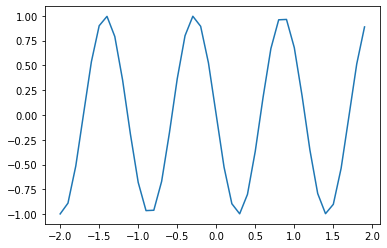

In [22]:
plt.plot(x,y)

plt.show()

In [23]:
x.shape

(40,)

### Ajuste polinomico a la curva seno creada

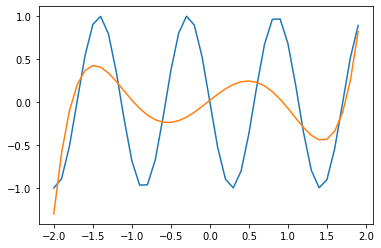

In [24]:
coeficientes = np.polyfit(x,y,5)     # curva inicial de 40 terminos aproxima a n-1
y_estimada = np.polyval(coeficientes,x)
 
plt.plot(x,y)
plt.plot(x,y_estimada)

plt.show()


## 2.2 Numeros Aleatorios

### Distribuciones de Probabilidad

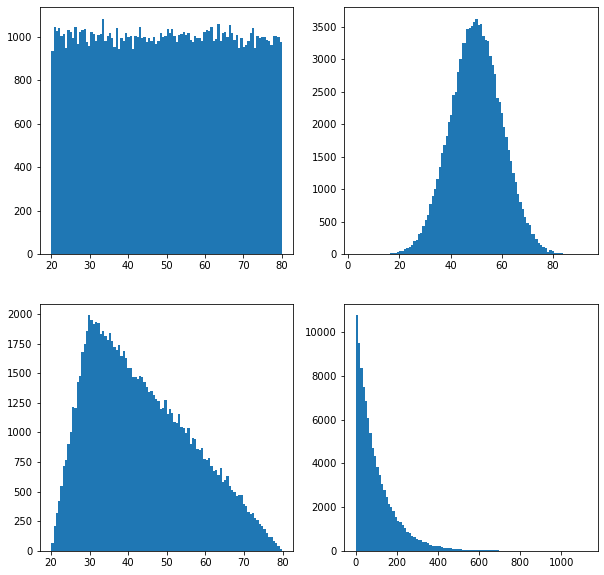

In [25]:
cantidad = 100000

plt.subplots(2,2,figsize=(10,10))

uniforme = np.random.uniform(20,80,cantidad)
plt.subplot(2,2,1)
plt.hist(uniforme, bins = 100)

normales = np.random.normal(50,10,cantidad)
plt.subplot(2,2,2)
plt.hist(normales, bins = 100)

triangular = np.random.triangular(20,30,80,cantidad)
plt.subplot(2,2,3)
plt.hist(triangular, bins = 100)

expo = np.random.exponential(100,cantidad)
plt.subplot(2,2,4)
plt.hist(expo, bins = 100)

plt.show()

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****3. Procesamiento de señal (scipy.signal)****<tfont>

La caja de herramientas de procesamiento de señales actualmente contiene algunas funciones de filtrado, un conjunto limitado de herramientas de diseño de filtros y algunos algoritmos de interpolación `B-spline` para datos 1 y 2-D. 

Si bien los algoritmos `B-spline` podrían ubicarse técnicamente en la categoría de interpolación, se incluyen aquí porque solo funcionan con datos igualmente espaciados y hacen un uso intensivo de la teoría de filtros y el formalismo de la función de transferencia para proporcionar una transformación `B-spline` rápida. Para comprender esta sección, deberá comprender que una señal en SciPy es una matriz de números reales o complejos.

In [27]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt


<div class="alert alert-info">Una función ideal para reconstruir muestras a partir de coeficientes de spline y es más rápida que convolve2d, lo que implica filtros arbitrarios en 2-D y permite elegir condiciones límite simétricas especulares.</div>

In [28]:
image= misc.face(gray=True).astype(np.float32)        #imagen de la libreria Scipy misc
image2 = misc.face()
derfilt = np.array([1.0,-2,1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)                     # Matrix de la imagen
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))            # derivada de la imagen completa forma 1 


<div class="alert alert-info">Alternativamente, podríamos haber hecho:</div>

In [23]:
laplacian = np.array([[0,1,0], [1,-4,1],[0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same', boundary='symm')        #derivada de la imagen completa forma 2

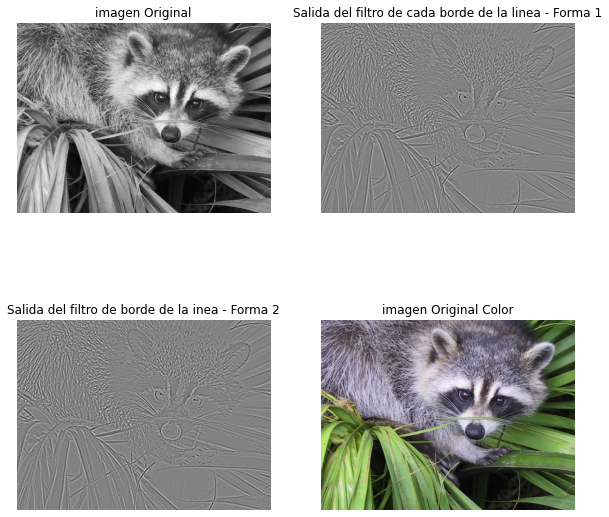

In [24]:
plt.subplots(2,2,figsize=(10,10))

plt.subplot(221)
plt.title("imagen Original")
plt.imshow(image)
plt.gray()
plt.axis('off')

plt.subplot(222)
plt.title("Salida del filtro de cada borde de la linea - Forma 1")
plt.imshow(deriv)
plt.gray()
plt.axis('off')


plt.subplot(223)
plt.title("Salida del filtro de borde de la inea - Forma 2")
plt.imshow(deriv2)
plt.gray()
plt.axis('off')

plt.subplot(224)
plt.title("imagen Original Color")
plt.imshow(image2)
plt.gray()
plt.axis('off')

plt.show()



![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****EJEMPLOS****<tfont>

### Ejemplo 01: Filtrado de Imagen - Desenfoque `convolve`

<div class="alert alert-info"> El <strong>filtrado</strong> es un nombre genérico para cualquier sistema que modifique una señal de entrada de alguna manera. En <strong>SciPy</strong>, una señal puede considerarse como una matriz <strong>NumPy</strong>. Existen diferentes tipos de filtros para diferentes tipos de operaciones.</div>

En ***Scipy*** `correlate` y/o `convolve` puede usarse para construir filtros de imagen arbitrarios para realizar acciones tales como desenfoque, mejora y detección de bordes para una imagen.

In [25]:
image = misc.face(gray=True)  #Imagen de librería Scipy misc
w = np.zeros((50, 50)) 
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w) #imagen filtrada con desenfoque convolve

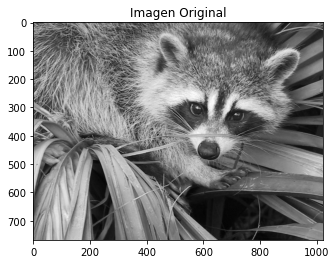

In [26]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Imagen Original')
plt.show()

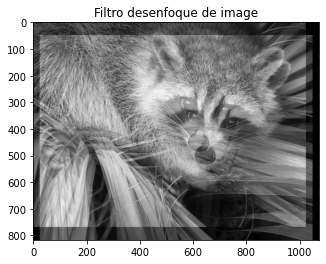

In [27]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtro desenfoque de image')
plt.show()

### Ejemplo 02: Filtrado de Imagen - Gaussiano - `gaussian`

<div class="alert alert-info">Como ejemplo, consideramos un filtro <strong>gaussiano</strong> que a menudo se usa para difuminar.</div>

In [30]:
image = misc.ascent()  #Imagen de librería Scipy misc
w = signal.windows.gaussian(51,10.0)  #imagen filtrada con gauss
image_new = signal.sepfir2d(image, w,w)  #imagen filtrada difuminada

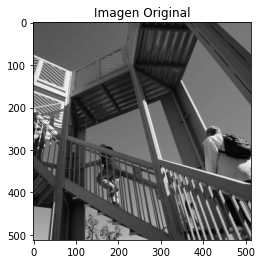

In [31]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Imagen Original')
plt.show()

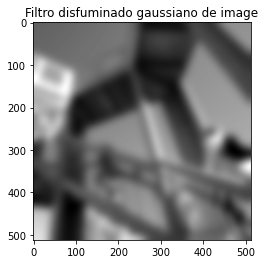

In [32]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtro disfuminado gaussiano de image')
plt.show()

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Documentación de NumPy: https://numpy.org/doc/stable/

[2] Algebra líneal con NumPy web Pybonacci: https://pybonacci.org/2012/06/07/algebra-lineal-en-python-con-numpy-i-operaciones-basicas/

[3] Funciones de distribución de probabilidad en NumPy: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[4] Algebra líneal en NumPy:https://numpy.org/doc/stable/reference/routines.linalg.html

[5] SymPy:https://www.sympy.org/en/index.html

[6] SciPy:https://www.scipy.org/

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)